In [3]:
def score_scale_fun(X, scores_old_min, scores_old_max, scores_new_min=0, scores_new_max=1):
    X = scores_new_max - ((scores_new_max - scores_new_min) * (scores_old_max - X) / (scores_old_max - scores_old_min))
    return X

def exp_scale_fun(df, exponent=-1):
    df_tranformed = 1 - ((df + 1.0)**(exponent))
    df_transformed_scaled = score_scale_fun(df_tranformed, df_tranformed.min(), df_tranformed.max(), df.min(), df.max())
    return df_transformed_scaled

In [4]:
import numpy as np
import pandas as pd

data = range(200)

df = pd.DataFrame({'original_data': data}, index=data)

df_transformed = exp_scale_fun(df.copy(), -1)
df_transformed.head()

,original_data
0,0.000000
1,100.000000
2,133.333333
3,150.000000
4,160.000000


In [89]:
import matplotlib.pyplot as plt

def nuss_style_fun(fig, ax, title, author_line=True):
    
    #remove top and right frame parts
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set left and bottom axis to grey
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    
    # set ticks to grey
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    
    #set labels to grey
    ax.yaxis.label.set_color('grey')
    ax.xaxis.label.set_color('grey') 
    
    # align axis labels with axis ends
    ax.set_xlabel(xlabel=None,
                  position=[0, 0],
                  horizontalalignment='left',
                  color='grey',
                  size=14)
    ax.set_ylabel(ylabel=None,
                  position=[0, 1],
                  horizontalalignment='right',
                  color='grey',
                  size=14)
    
    #align title
    ax.set_title(label=title,
                 loc='left',
                 color=(0.41, 0.41, 0.41),
                 size=20)
    
    #author line
    if author_line:
        fig.text(0.99, 0.01, '@rikunert', color='lightgrey', style='italic',
             horizontalalignment='right')
    
    return ax

def transformation_viz_fun(df, title):
        
        # initialise plot
        fig, ax = plt.subplots()
        
        # draw line chart
        df.plot(cmap=plt.get_cmap('viridis'),
                ax=ax)
        
        # adjust style
        ax = nuss_style_fun(fig, ax, title=title)
        
        # label axes
        ax.set(xlabel='Original scale',
              ylabel='Transformed scale')
        
        # reverse legend labels
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(reversed(handles), reversed(labels))
        
        return fig, ax

In [90]:
data = np.linspace(0, 1, 100)

df = pd.DataFrame({'original data': data}, index=data)

for exponent in [-0.01, -1, -2.5, -5, -10, -20]:
    df['exponent: {}'.format(exponent)] = exp_scale_fun(df, exponent=exponent).iloc[:, 0]
df.head()

,original data,exponent: -0.01,exponent: -1,exponent: -2.5,exponent: -5,exponent: -10,exponent: -20
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.010101,0.010101,0.014549,0.020000,0.030141,0.050591,0.095711,0.182093
0.020202,0.020202,0.028952,0.039604,0.059245,0.098235,0.181452,0.329689
0.030303,0.030303,0.043212,0.058824,0.087358,0.143132,0.258344,0.449573
0.040404,0.040404,0.057331,0.077670,0.114523,0.185463,0.327375,0.547145


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x157e62659e8>)

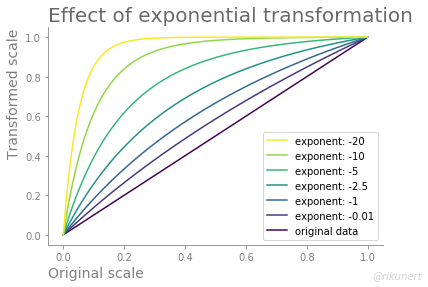

In [91]:
transformation_viz_fun(df, title='Effect of exponential transformation')